In [1]:
from aif360.datasets import AdultDataset
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
# 1. 加载数据集并分割为训练集和验证集
dataset = AdultDataset()
(dataset_orig_train, dataset_orig_val) = dataset.split([0.7], shuffle=True)

# 准备训练集的特征 (X) 和目标 (y)
X_train = dataset_orig_train.features
y_train = dataset_orig_train.labels.ravel()

In [3]:
# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')  # 我们想要10个簇
kmeans.fit(X_train)

# 获取每个数据点的簇标签
labels = kmeans.labels_
print(labels)
# 查看每个簇的中心
centers = kmeans.cluster_centers_

[2 0 7 ... 0 0 0]


In [4]:
# 创建一个DataFrame，包含特征和簇标签
df = pd.DataFrame(X_train, columns=dataset_orig_train.feature_names)
df['cluster'] = labels

# 按簇标签分组，然后计算每个特征的统计量
cluster_stats = df.groupby('cluster').agg(['mean', 'median', 'min', 'max', 'std'])
# 输出到Excel文件
# cluster_stats.to_excel('cluster_stats.xlsx')

In [8]:
# 获取类别特征的列索引
categorical_features = dataset_orig_train.feature_names

# 创建一个DataFrame，包含特征和簇标签
df = pd.DataFrame(X_train, columns=dataset_orig_train.feature_names)
df['cluster'] = labels

# 对每个类别特征，计算每个簇中每个类别的频率
for feature in categorical_features:
    counts = df.groupby('cluster')[feature].value_counts(normalize=True)
    print(f"{feature} counts:")
    print(counts)
    print()


age counts:
cluster  age 
0        23.0    0.030144
         35.0    0.028841
         31.0    0.028552
         36.0    0.028154
         33.0    0.028081
                   ...   
8        74.0    0.001634
         17.0    0.001634
9        63.0    0.333333
         36.0    0.333333
         27.0    0.333333
Name: proportion, Length: 456, dtype: float64

education-num counts:
cluster  education-num
0        9.0              0.336542
         10.0             0.225990
         13.0             0.160093
         14.0             0.047405
         11.0             0.042737
                            ...   
8        8.0              0.006536
         2.0              0.003268
9        14.0             0.333333
         9.0              0.333333
         1.0              0.333333
Name: proportion, Length: 120, dtype: float64

race counts:
cluster  race
0        1.0     0.856807
         0.0     0.143193
1        1.0     0.887417
         0.0     0.112583
2        1.0     0.877598
       

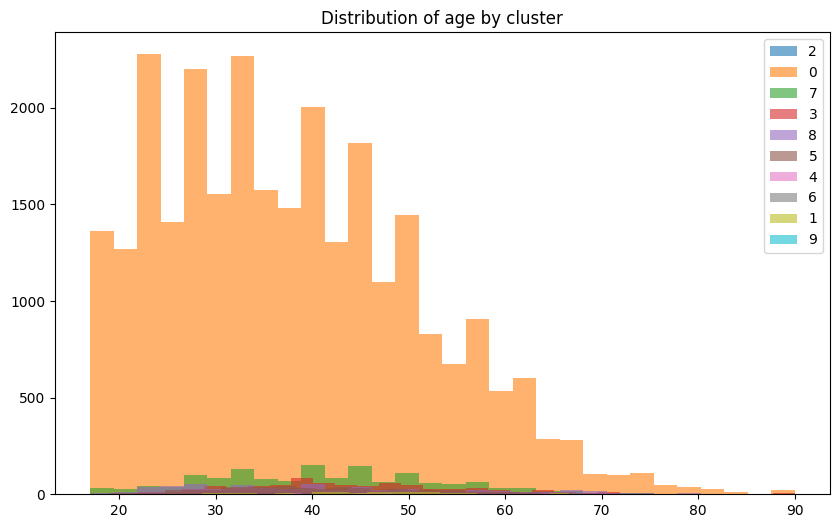

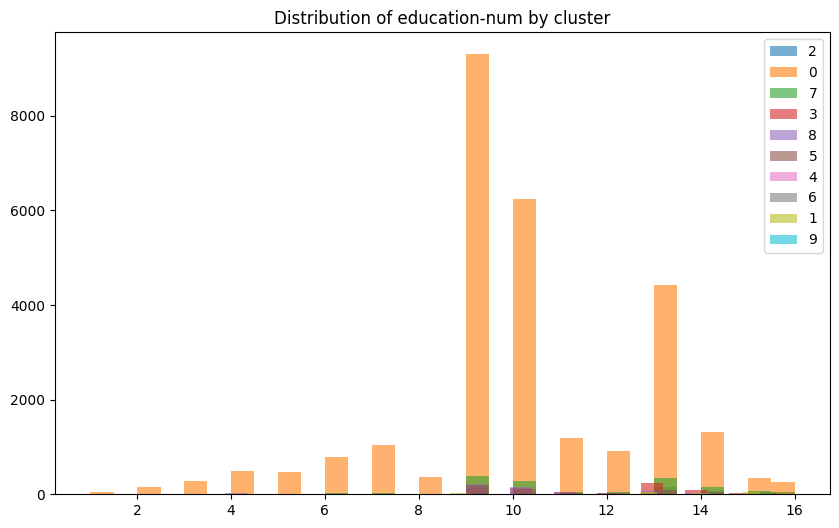

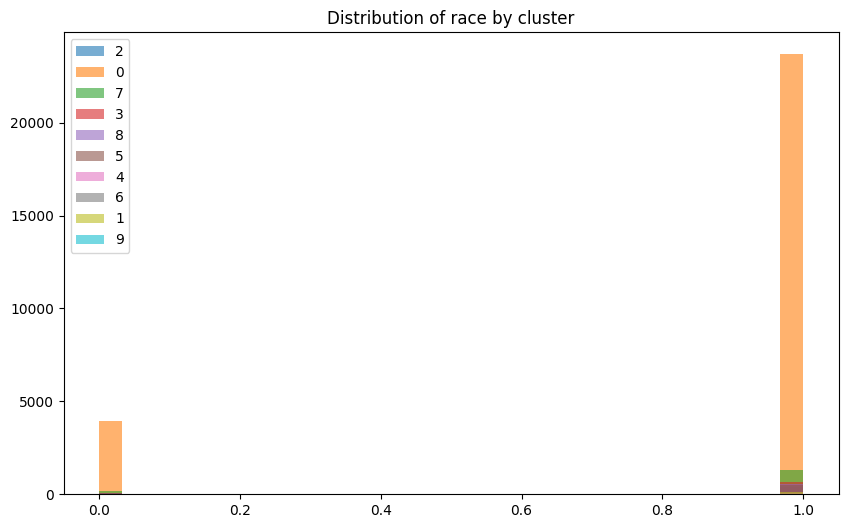

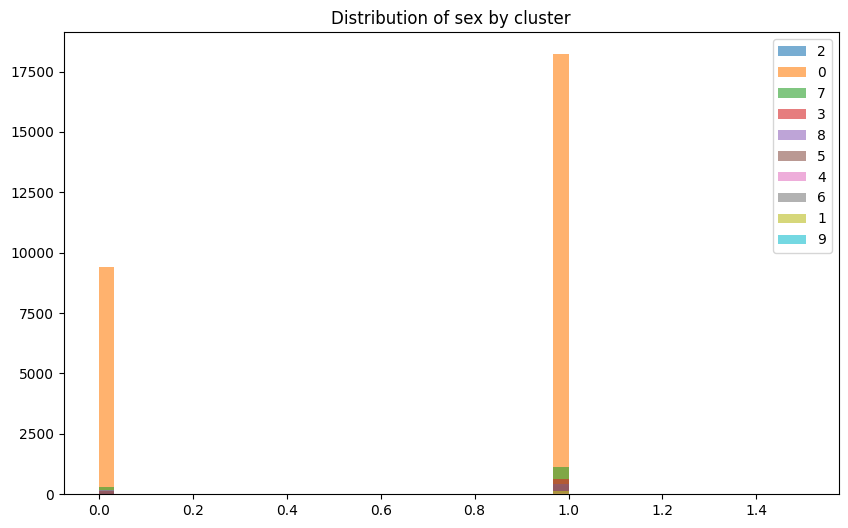

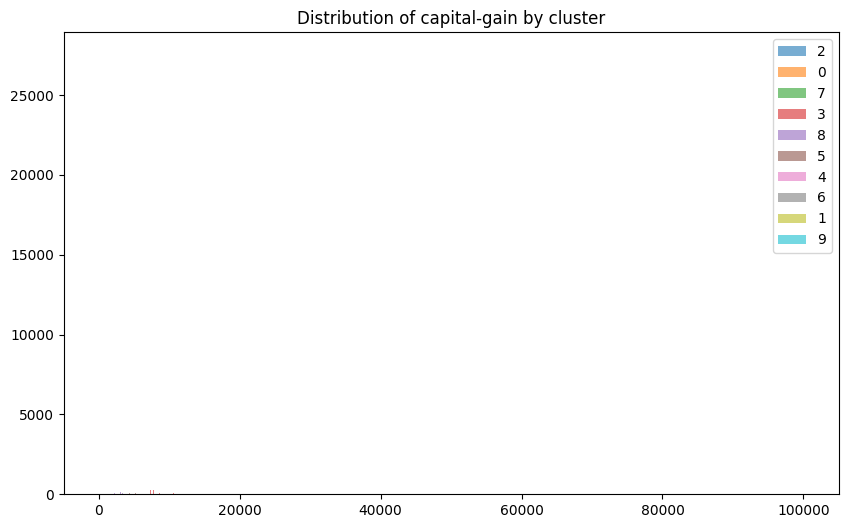

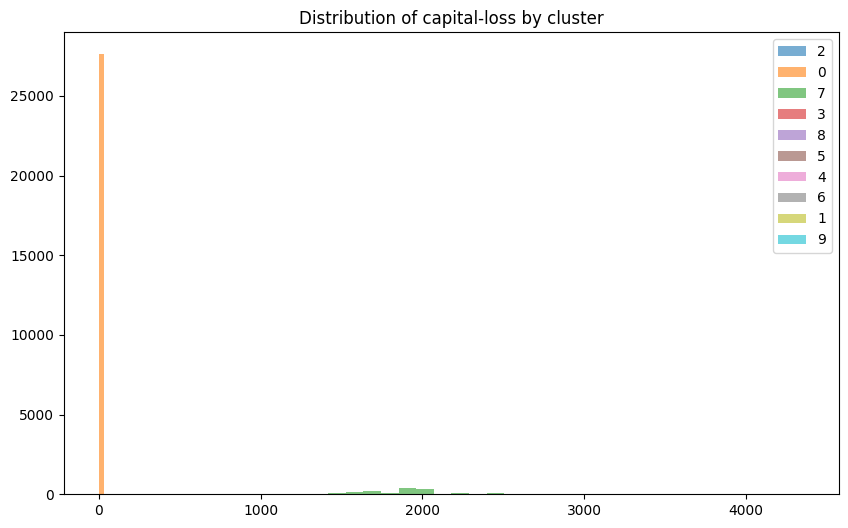

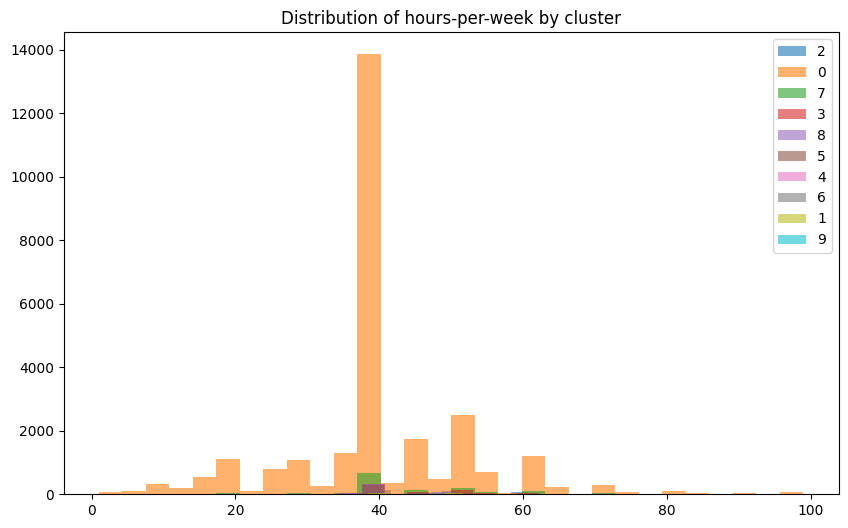

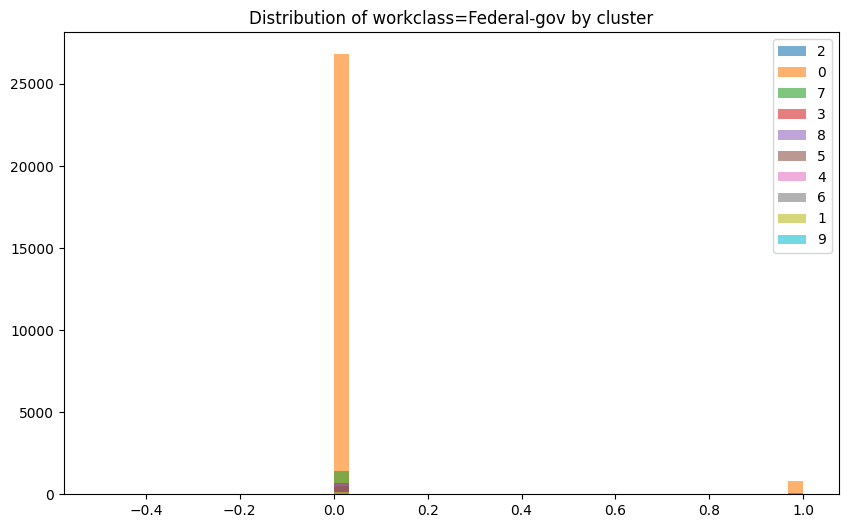

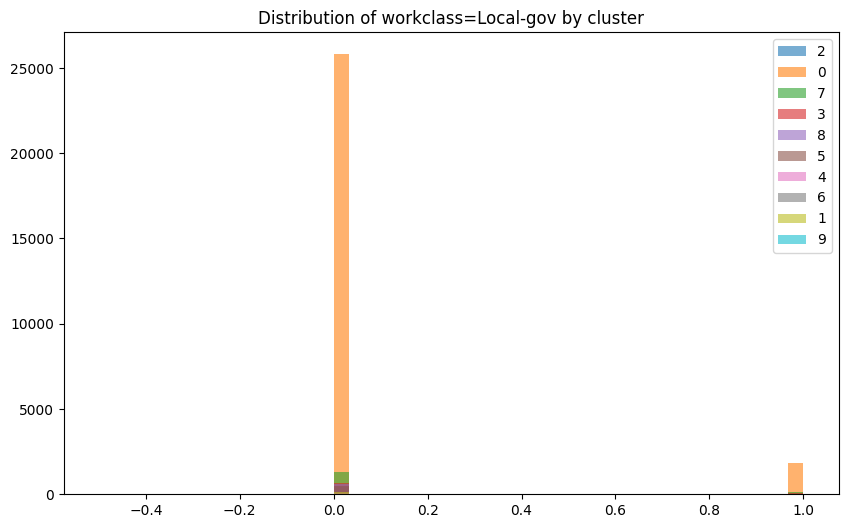

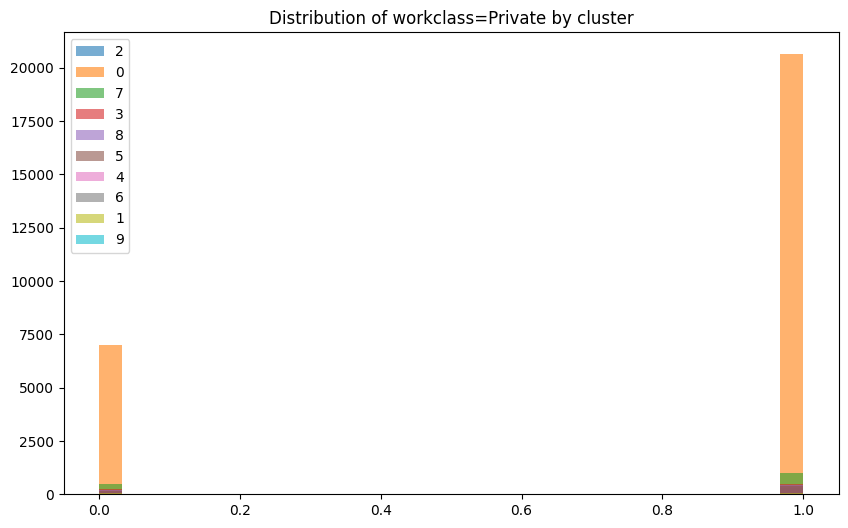

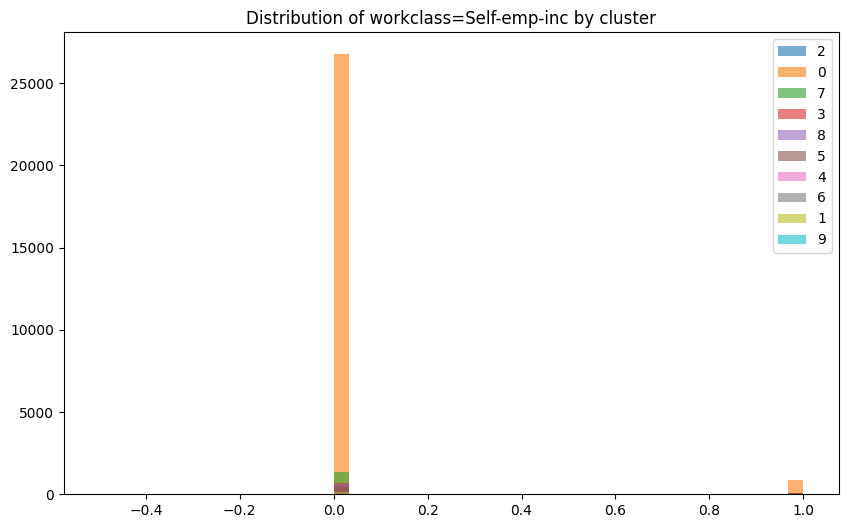

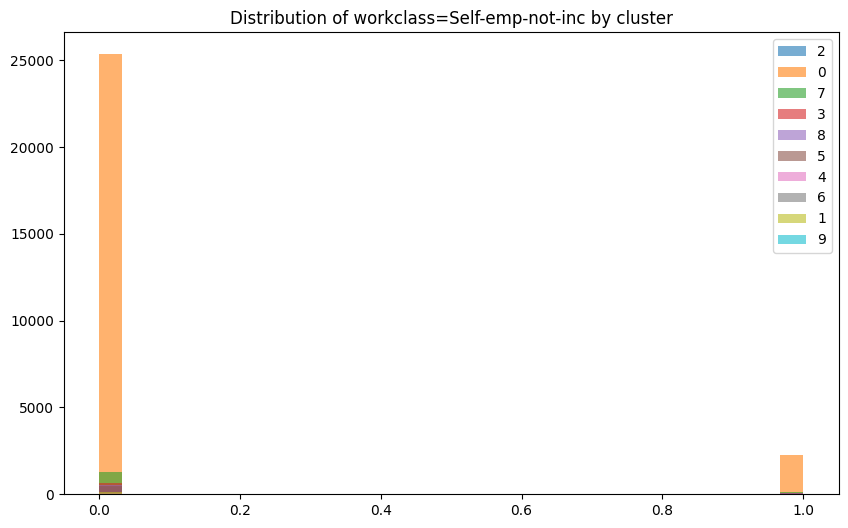

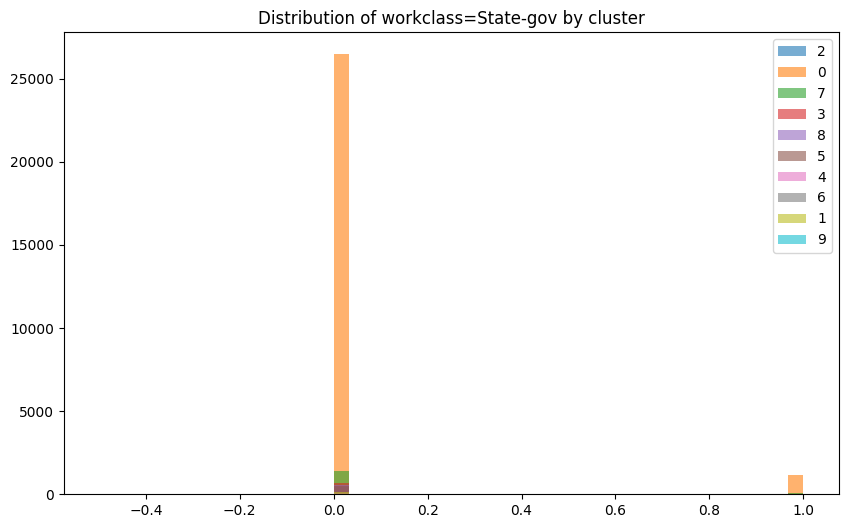

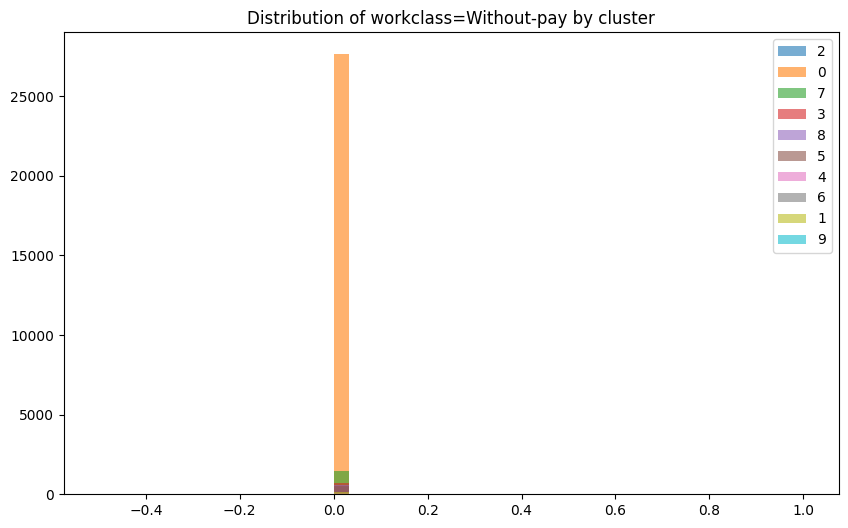

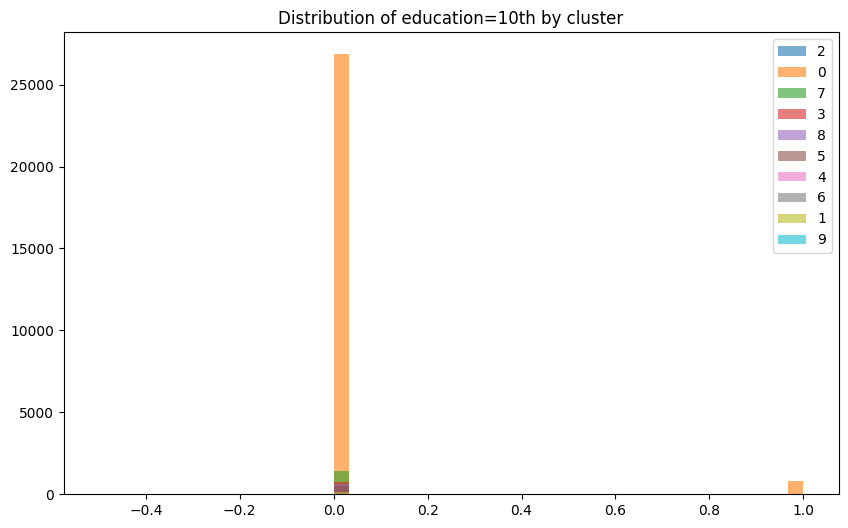

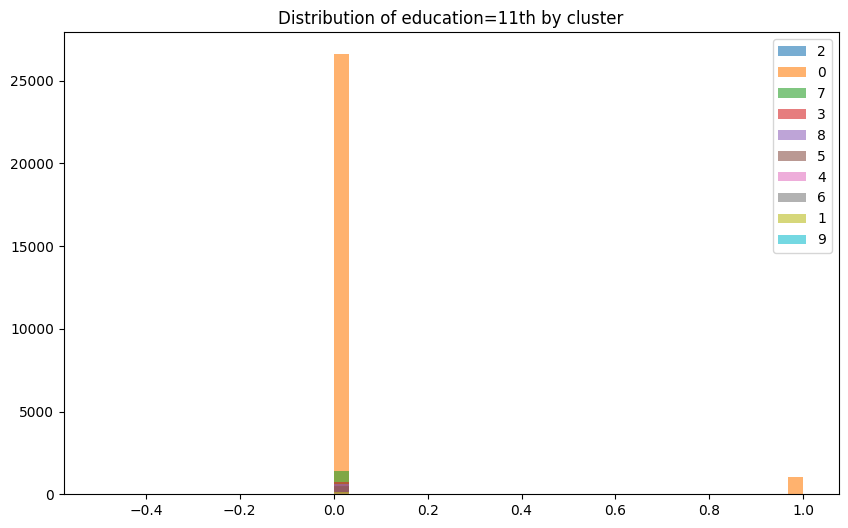

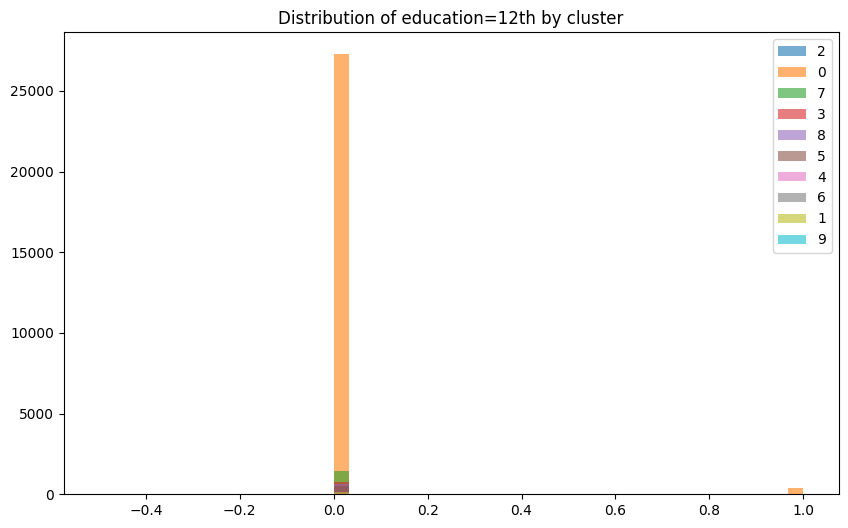

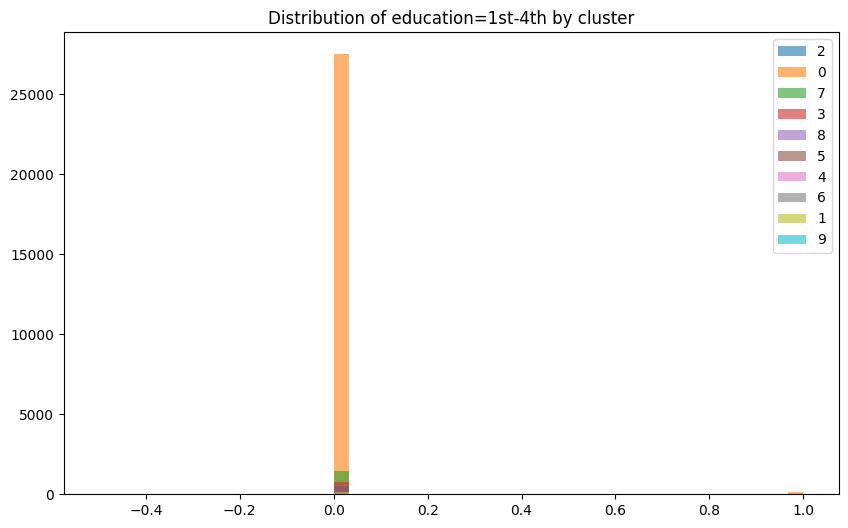

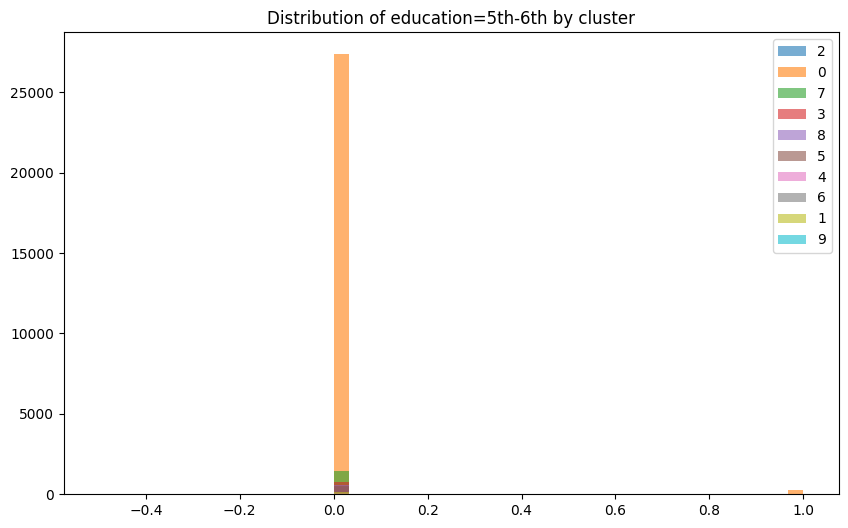

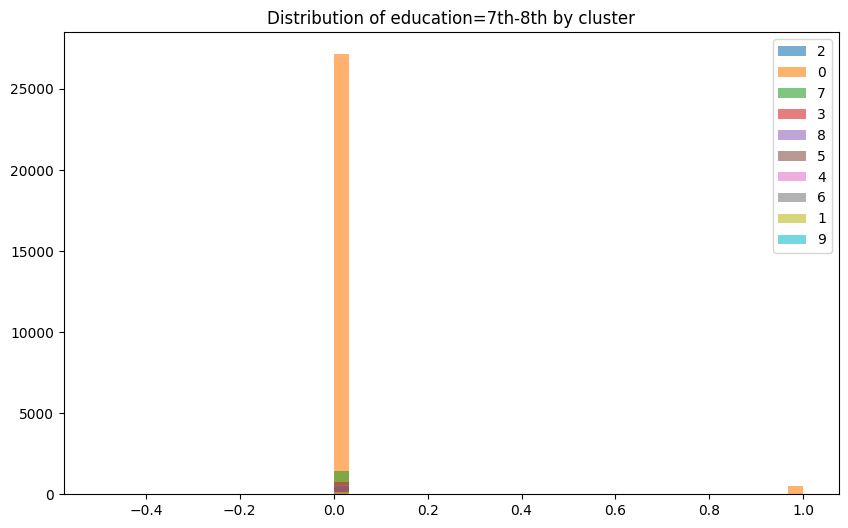

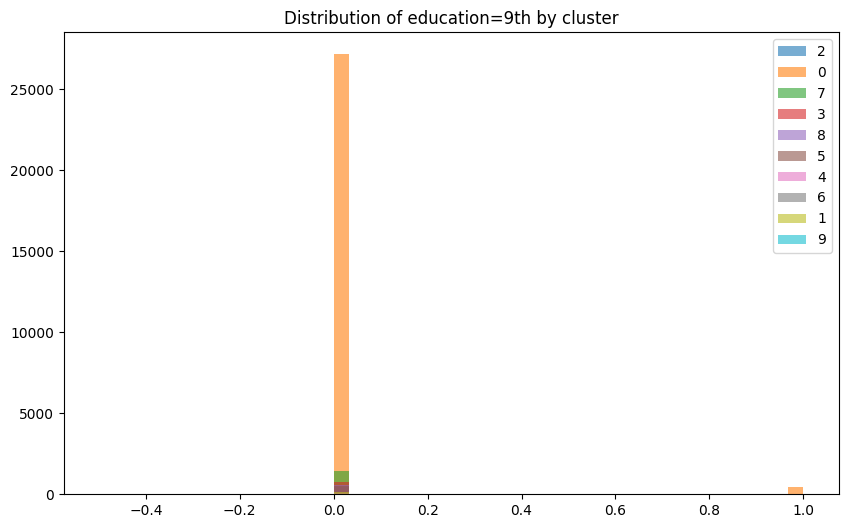

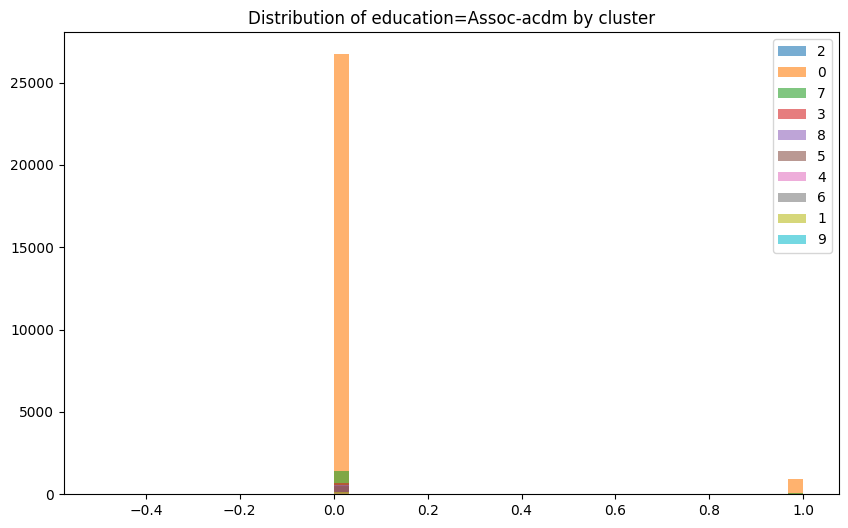

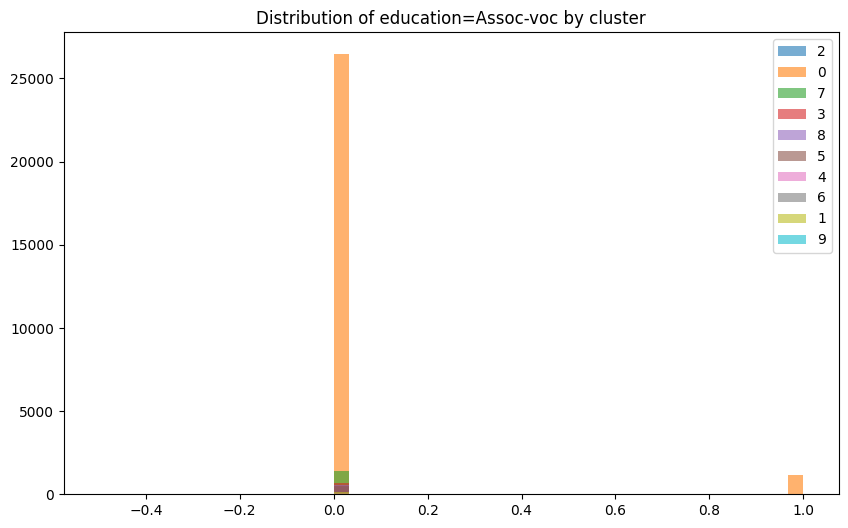

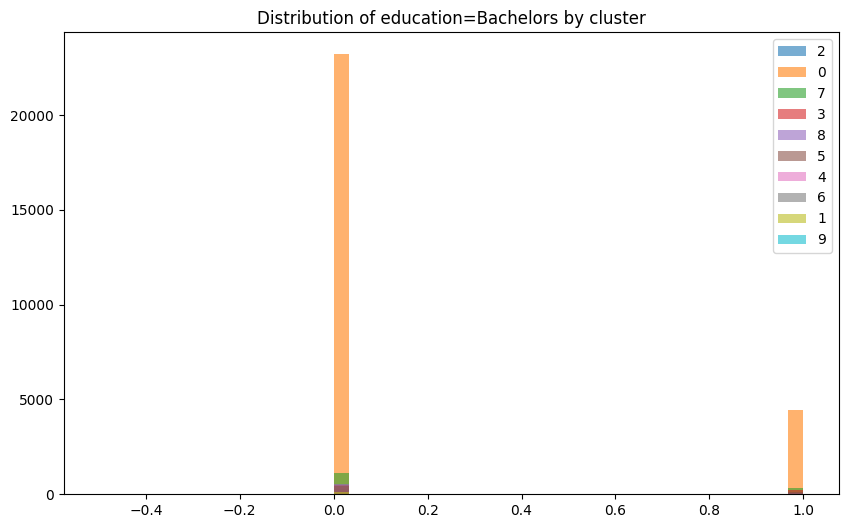

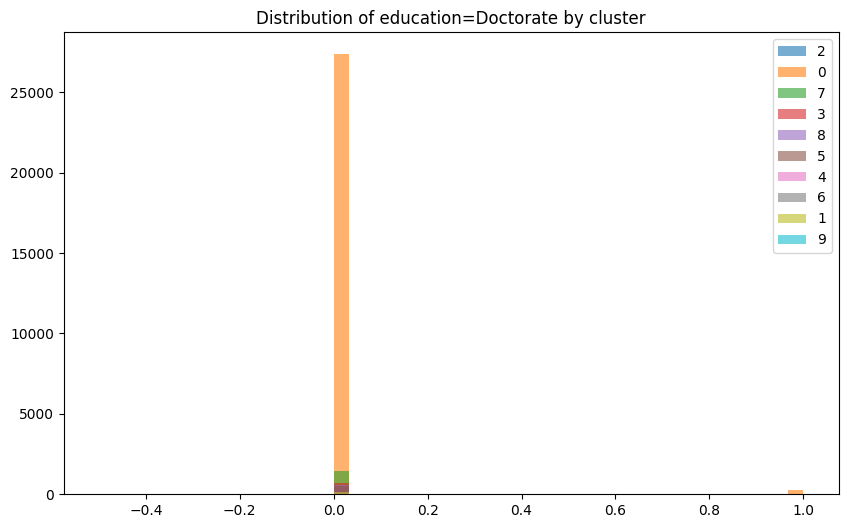

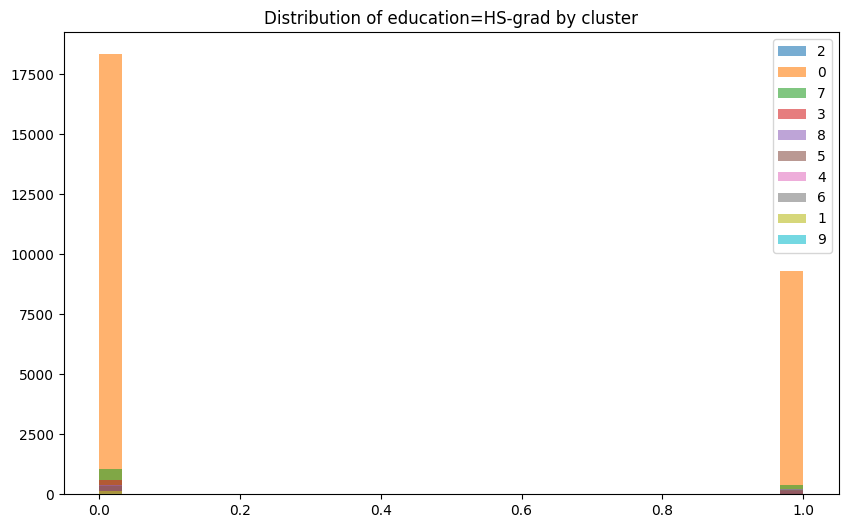

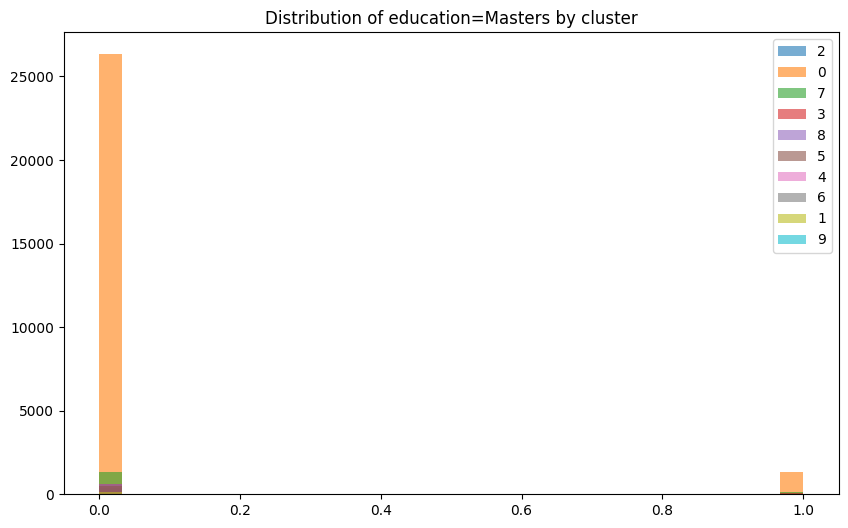

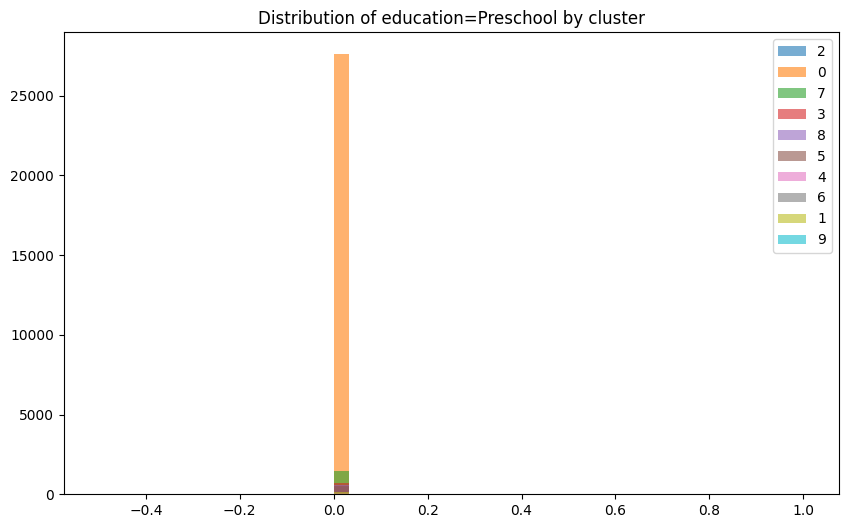

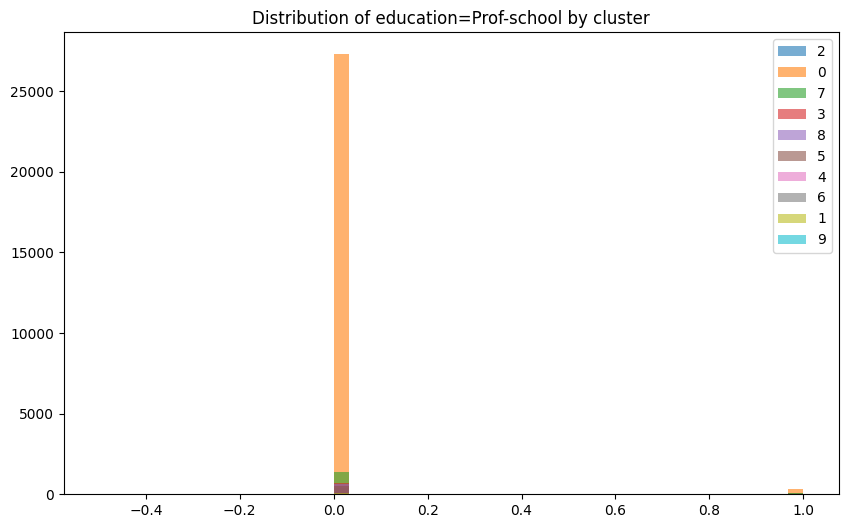

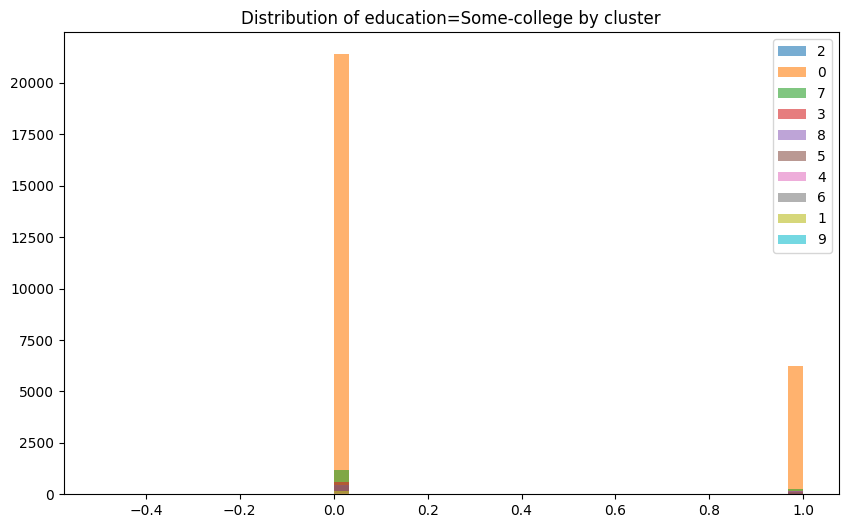

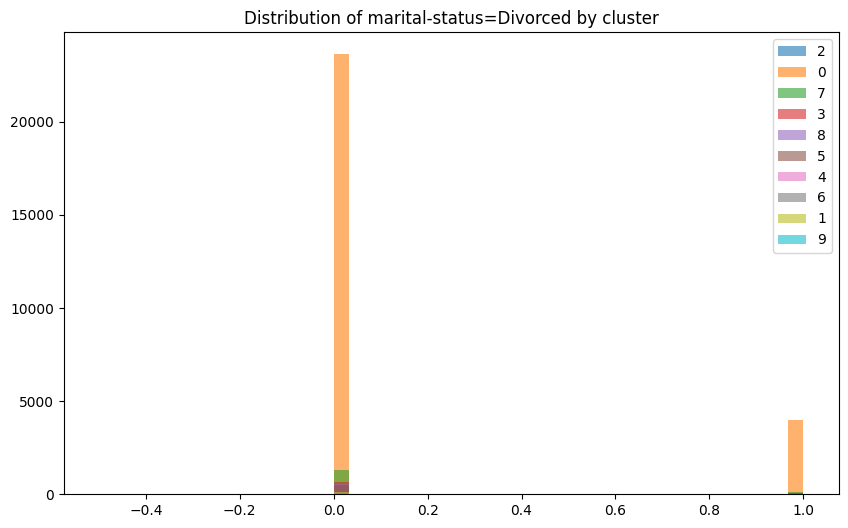

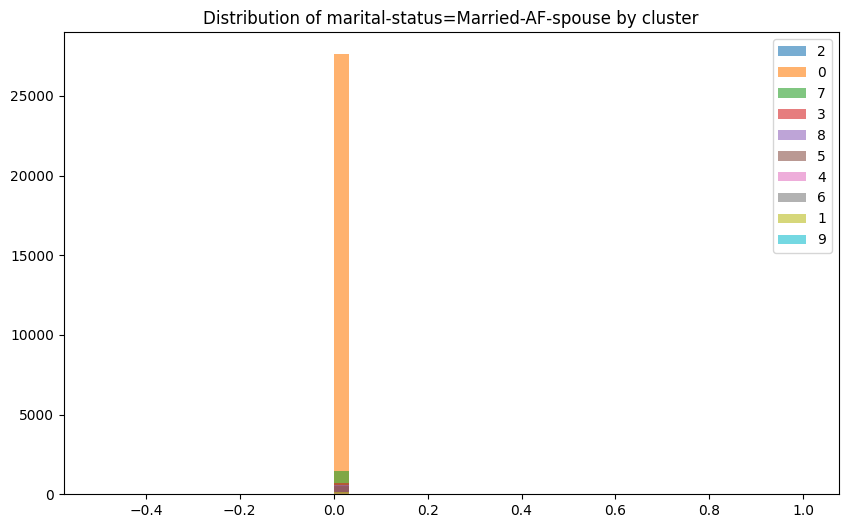

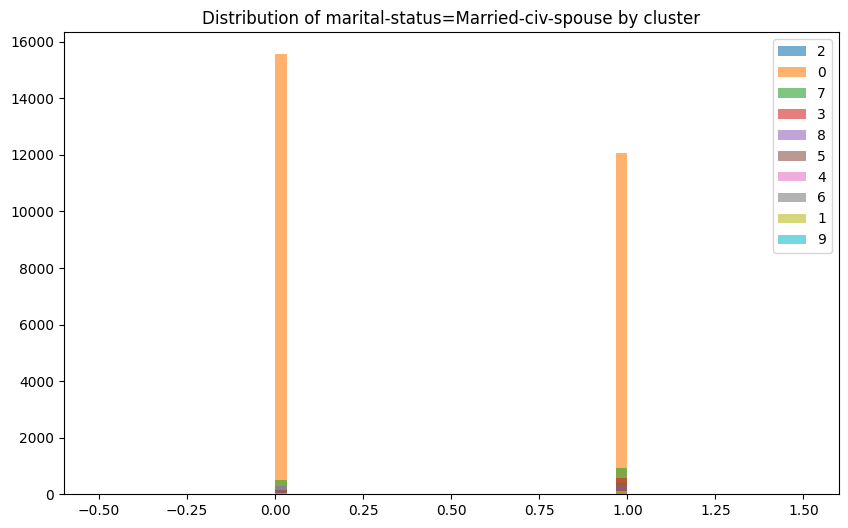

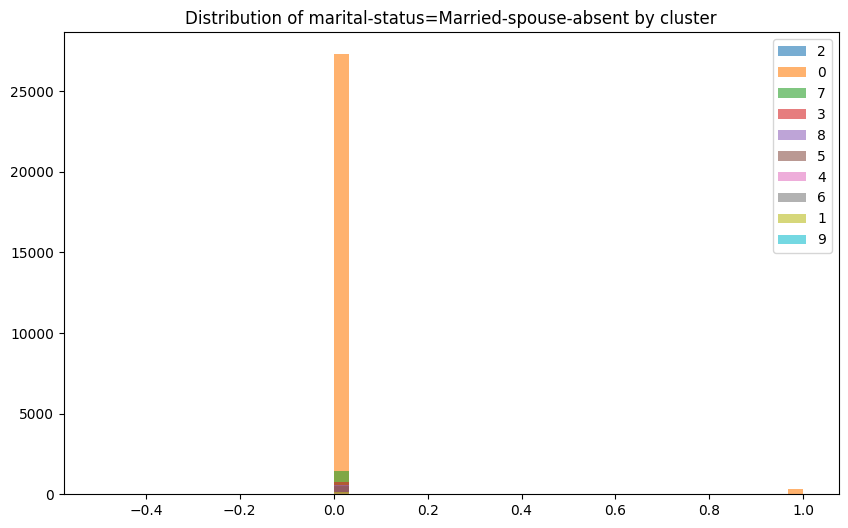

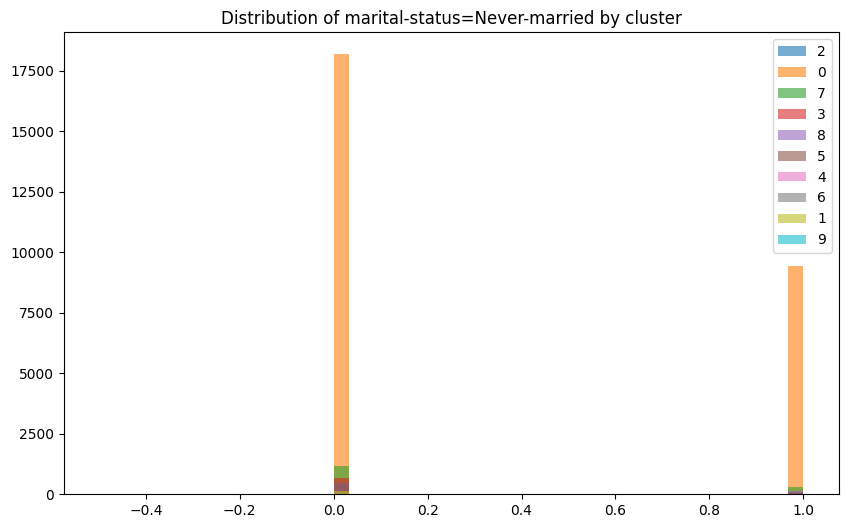

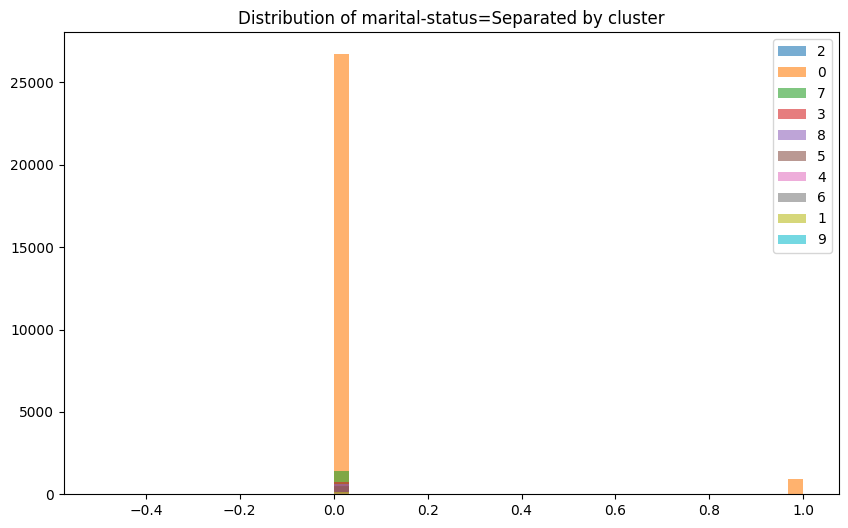

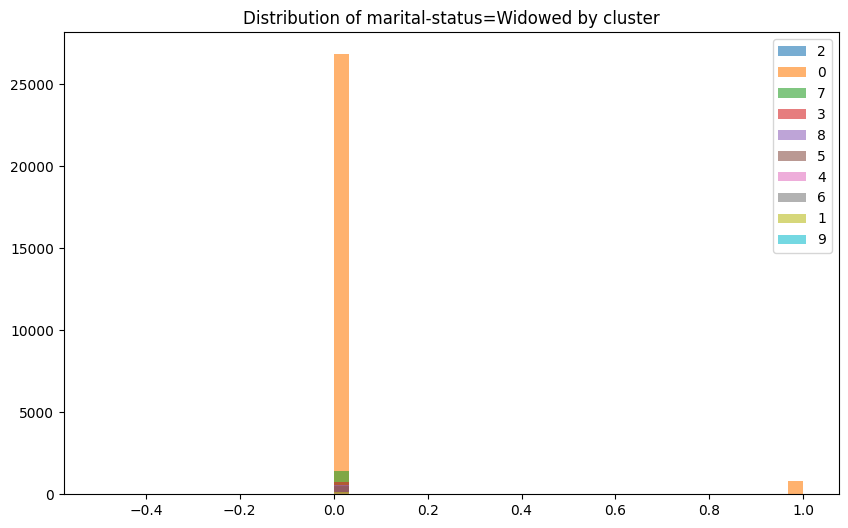

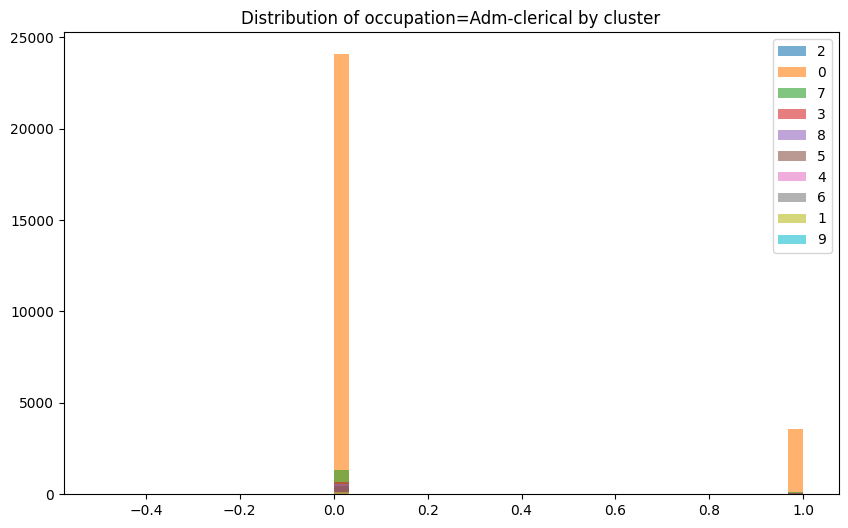

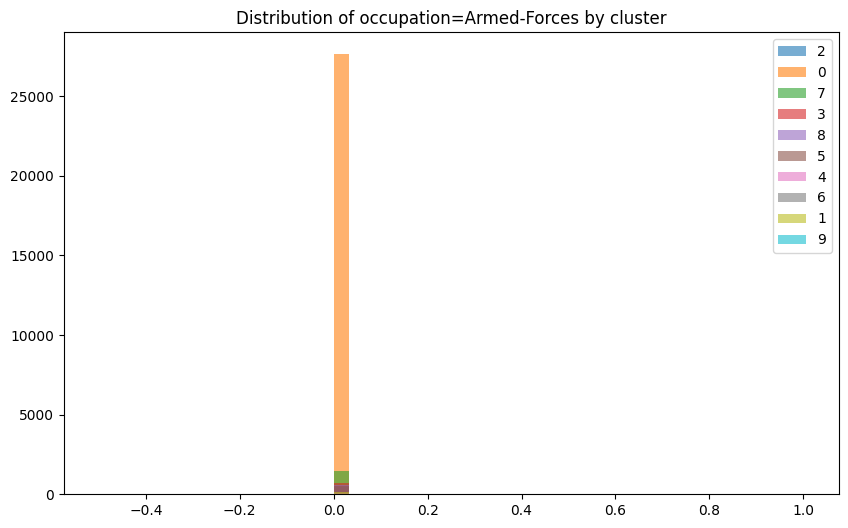

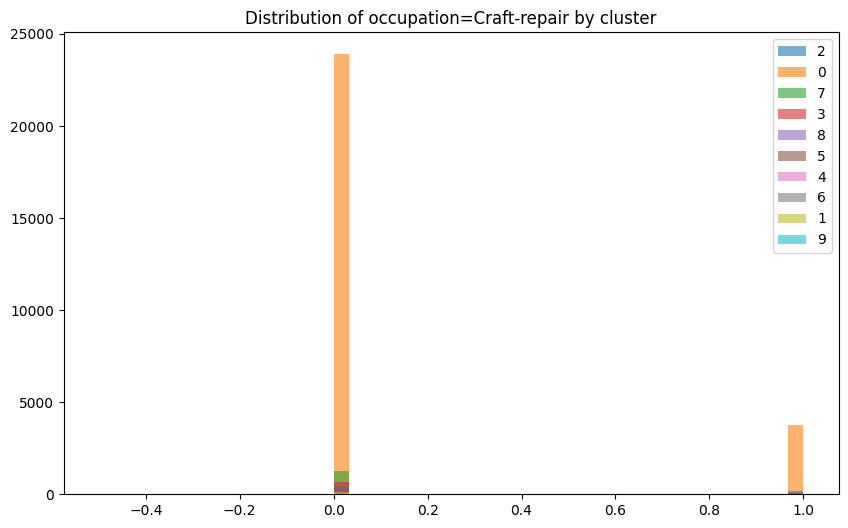

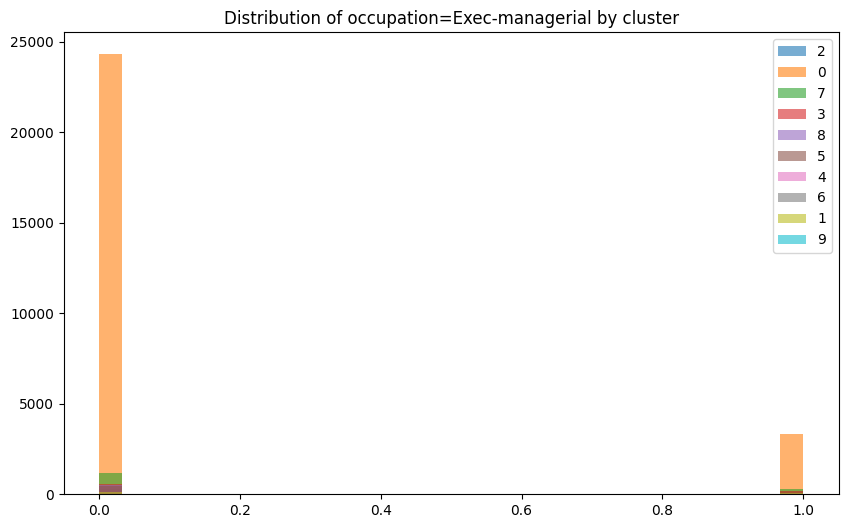

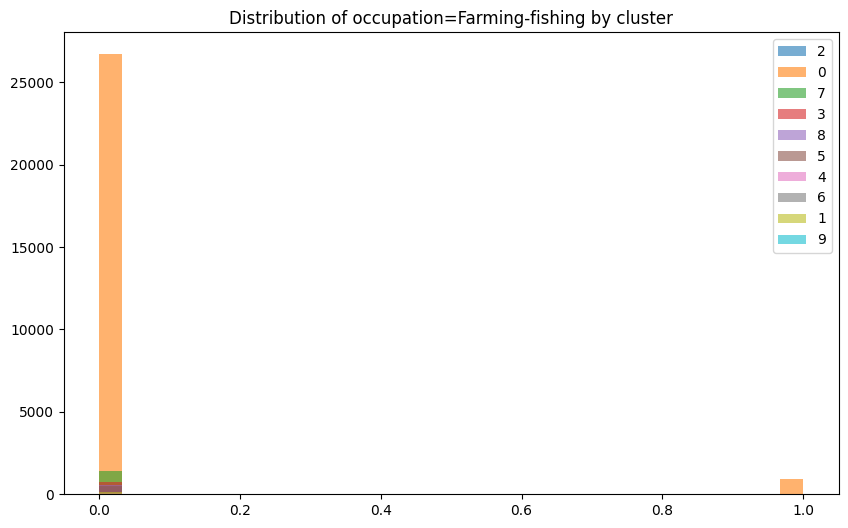

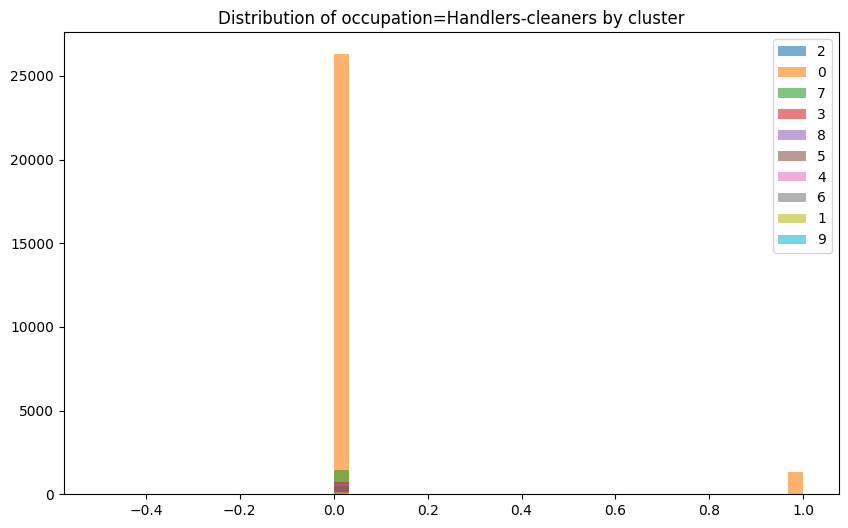

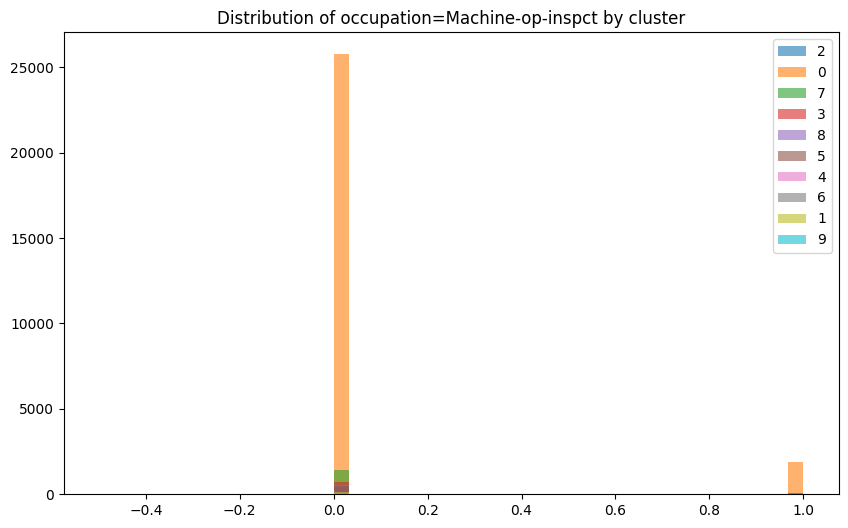

In [ ]:
import matplotlib.pyplot as plt

# 对每个特征，画出不同簇的分布图
for feature in df.columns.drop('cluster'):
    plt.figure(figsize=(10, 6))
    for cluster in df['cluster'].unique():
        subset = df[df['cluster'] == cluster]
        plt.hist(subset[feature], bins=30, label=str(cluster), alpha=0.6)
    plt.title(f"Distribution of {feature} by cluster")
    plt.legend()
    plt.show()
